<a href="https://colab.research.google.com/github/EricaBassan/AluraChallenge/blob/main/TechChallenge_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:

##Exportando os valores de exportação

dados_2007= pd.read_html('http://vitibrasil.cnpuv.embrapa.br/index.php?ano=2007&opcao=opt_06&subopcao=subopt_01',encoding='UTF-8' )
dados_2008= pd.read_html('http://vitibrasil.cnpuv.embrapa.br/index.php?ano=2008&opcao=opt_06&subopcao=subopt_01',encoding='UTF-8' )
dados_2009= pd.read_html('http://vitibrasil.cnpuv.embrapa.br/index.php?ano=2009&opcao=opt_06&subopcao=subopt_01',encoding='UTF-8' )
dados_2010= pd.read_html('http://vitibrasil.cnpuv.embrapa.br/index.php?ano=2010&opcao=opt_06&subopcao=subopt_01',encoding='UTF-8' )
dados_2011= pd.read_html('http://vitibrasil.cnpuv.embrapa.br/index.php?ano=2011&opcao=opt_06&subopcao=subopt_01',encoding='UTF-8' )
dados_2012= pd.read_html('http://vitibrasil.cnpuv.embrapa.br/index.php?ano=2012&opcao=opt_06&subopcao=subopt_01',encoding='UTF-8' )
dados_2013= pd.read_html('http://vitibrasil.cnpuv.embrapa.br/index.php?ano=2013&opcao=opt_06&subopcao=subopt_01',encoding='UTF-8' )
dados_2014= pd.read_html('http://vitibrasil.cnpuv.embrapa.br/index.php?ano=2014&opcao=opt_06&subopcao=subopt_01',encoding='UTF-8' )
dados_2015= pd.read_html('http://vitibrasil.cnpuv.embrapa.br/index.php?ano=2015&opcao=opt_06&subopcao=subopt_01',encoding='UTF-8' )
dados_2016= pd.read_html('http://vitibrasil.cnpuv.embrapa.br/index.php?ano=2016&opcao=opt_06&subopcao=subopt_01',encoding='UTF-8' )
dados_2017= pd.read_html('http://vitibrasil.cnpuv.embrapa.br/index.php?ano=2017&opcao=opt_06&subopcao=subopt_01',encoding='UTF-8' )
dados_2018= pd.read_html('http://vitibrasil.cnpuv.embrapa.br/index.php?ano=2018&opcao=opt_06&subopcao=subopt_01',encoding='UTF-8' )
dados_2019= pd.read_html('http://vitibrasil.cnpuv.embrapa.br/index.php?ano=2019&opcao=opt_06&subopcao=subopt_01',encoding='UTF-8' )
dados_2020= pd.read_html('http://vitibrasil.cnpuv.embrapa.br/index.php?ano=2020&opcao=opt_06&subopcao=subopt_01',encoding='UTF-8' )
dados_2021= pd.read_html('http://vitibrasil.cnpuv.embrapa.br/index.php?ano=2021&opcao=opt_06&subopcao=subopt_01',encoding='UTF-8' )

In [3]:
# Passando os valores extaídos para csv:

dados_2007 = dados_2007[5]
dados_2007.to_csv('dados_2007.csv', index=False)

dados_2008 = dados_2008[5]
dados_2008.to_csv('dados_2008.csv', index=False)

dados_2009 = dados_2009[5]
dados_2009.to_csv('dados_2009.csv', index=False)

dados_2010 = dados_2010[5]
dados_2010.to_csv('dados_2010.csv', index=False)

dados_2011 = dados_2011[5]
dados_2011.to_csv('dados_2011.csv', index=False)

dados_2012 = dados_2012[5]
dados_2012.to_csv('dados_2012.csv', index=False)

dados_2013 = dados_2013[5]
dados_2013.to_csv('dados_2013.csv', index=False)

dados_2014 = dados_2014[5]
dados_2014.to_csv('dados_2014.csv', index=False)

dados_2015 = dados_2015[5]
dados_2015.to_csv('dados_2015.csv', index=False)

dados_2016 = dados_2016[5]
dados_2016.to_csv('dados_2016.csv', index=False)

dados_2017 = dados_2017[5]
dados_2017.to_csv('dados_2017.csv', index=False)

dados_2018 = dados_2018[5]
dados_2018.to_csv('dados_2018.csv', index=False)

dados_2019 = dados_2019[5]
dados_2019.to_csv('dados_2019.csv', index=False)

dados_2020 = dados_2020[5]
dados_2020.to_csv('dados_2020.csv', index=False)

dados_2021 = dados_2021[5]
dados_2021.to_csv('dados_2021.csv', index=False)


In [4]:
# Agrupando todos os arquivos de exportação

dados_exportacao=[dados_2007,
                  dados_2008,
                  dados_2009,
                  dados_2010,
                  dados_2011,
                  dados_2012,
                  dados_2013,
                  dados_2014,
                  dados_2015,
                  dados_2016,
                  dados_2017,
                  dados_2018,
                  dados_2019,
                  dados_2020,
                  dados_2021]

In [5]:
#Concatenando a lista
dados_exportacao= pd.concat(dados_exportacao)

#Removendo e substituindo caracteres e pontos para converter tipos de dados das colunas

dados_exportacao["Quantidade (Kg)"] = dados_exportacao["Quantidade (Kg)"].str.replace('.','').replace('-', '0')
dados_exportacao["Valor (US$)"] = dados_exportacao["Valor (US$)"].str.replace('.','').replace('-', '0')

#Alterando os tipos das colunas

dados_exportacao["Quantidade (Kg)"] = pd.to_numeric(dados_exportacao["Quantidade (Kg)"], downcast="integer")
dados_exportacao["Valor (US$)"] = pd.to_numeric(dados_exportacao["Valor (US$)"], downcast="float")

#Agregando as colunas

dados_exportacao = dados_exportacao.groupby(['Países']).agg({'Quantidade (Kg)':'sum','Valor (US$)':'sum' })

#Resetando index

dados_exportacao= dados_exportacao.reset_index()

#Renomeando coluna

dados_exportacao = dados_exportacao.rename(columns={'Países':"País destino"})

#Inserindo coluna País origem (Brasil)

dados_exportacao.insert(0, "País origem", "Brasil")

#Renomeando alguns nomes de paises, para ficar mais apresentável (ex.:País Alemanha, República Democrática para Alemanha)
dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('Alemanha, República Democrática','Alemanha')
dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('Tcheca, República','República Tcheca')
dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('Taiwan (FORMOSA)','Taiwan')
dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('Marshall, Ilhas','Ilhas Marshall')
dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('Coreia, Republica Sul', 'Coréia do Sul')
dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('Cayman, Ilhas', 'Ilhas Cayman')
dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('Eslovaca, Republica', 'Eslováquia')


<ipython-input-5-377f46eb0314>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_exportacao["Quantidade (Kg)"] = dados_exportacao["Quantidade (Kg)"].str.replace('.','').replace('-', '0')
<ipython-input-5-377f46eb0314>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_exportacao["Valor (US$)"] = dados_exportacao["Valor (US$)"].str.replace('.','').replace('-', '0')


In [6]:
#Tabela com Pais de origem, país destino, Quantidade de vinho exportado (Kg), e Valor exportado (US$)

dados_exportacao

,País origem,País destino,Quantidade (Kg),Valor (US$)
0,Brasil,Afeganistão,11,46.0
1,Brasil,Alemanha,1020933,2739079.0
2,Brasil,Angola,190731,621181.0
3,Brasil,Anguilla,0,0.0
4,Brasil,Antilhas Holandesas,114027,160864.0
...,...,...,...,...
120,Brasil,Vanuatu,18,31.0
121,Brasil,Venezuela,52995,83847.0
122,Brasil,Vietnã,9669,12736.0
123,Brasil,África do Sul,30,116.0


**MAPA DE CALOR GEOGRÁFICO**

In [7]:
#Renomear países para ficarem iguais aos da tabela de ISO que será exportada futuramente

dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('Barein', 'Bahrein')
dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('Belice', 'Belize')
dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('Bósnia-Herzegovina', 'Bósnia-Herzegóvina')
dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('Catar', 'Qatar')
dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('Croácia', 'Croácia (Hrvatska)')
dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('Emirados Arabes Unidos', 'Emirados árabes Unidos')
dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('Guine Bissau', 'Guiné-Bissau')
dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('Guine Equatorial', 'Guiné Equatorial')
dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('Ilha de Man', 'Ilha do Homem')
dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('India', 'índia')
dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('Malásia', 'MalÁsia')
dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('Namibia', 'Namíbia')
dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('Nicaragua', 'Nicarágua')
dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('Nova Zelândia', 'Nova Zelãndia')
dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('Quênia', 'Kênia')
dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('Reino Unido', 'Grã-Bretanha (Reino Unido, UK)')
dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('Rússia', 'Rússia (URSS) - Federação Russa')
dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('Singapura', 'Cingapura')
dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('Trinidade Tobago', 'Trinidade e Tobago')
dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('São Vicente e Granadinas', 'São Vincente e Granadinas')
dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('Curaçao', 'Curação')
dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('Comores', 'Ilhas Comores')
dados_exportacao["País destino"] = dados_exportacao["País destino"].replace('Países Baixos', 'Holanda')

#Criar tabela secundária de País destino (como index), Quantidade (Kg) e Valor (US$)

pais_e_valor= dados_exportacao.set_index("País destino")
pais_e_valor.index = pais_e_valor.index.str.strip()
pais_e_valor.drop("País origem", inplace=True, axis=1)


#Excluir países sem valores de exportaçãoe o total
pais_e_valor.drop("Anguilla", inplace=True)
pais_e_valor.drop("Costa do Marfim", inplace=True)
pais_e_valor.drop("Ilhas Virgens", inplace=True)
pais_e_valor.drop("Iraque", inplace=True)
pais_e_valor.drop("Jamaica", inplace=True)
pais_e_valor.drop("Líbano", inplace=True)
pais_e_valor.drop("Porto Rico", inplace=True)
pais_e_valor.drop("Senegal", inplace=True)
pais_e_valor.drop("Tanzânia", inplace=True)
pais_e_valor.drop("Tunísia", inplace=True)
pais_e_valor.drop("Total", inplace=True)

pais_e_valor

,Quantidade (Kg),Valor (US$)
País destino,,
Afeganistão,11,46.0
Alemanha,1020933,2739079.0
Angola,190731,621181.0
Antilhas Holandesas,114027,160864.0
Antígua e Barbuda,1685,5872.0
...,...,...
Vanuatu,18,31.0
Venezuela,52995,83847.0
Vietnã,9669,12736.0


In [8]:
#Exportando codigo ISO dos países do mundo

codigo_paises= pd.read_html('https://www.inf.ufrgs.br/~cabral/Voltagem.Codigos.2020.10.05.html',encoding='UTF-8' )
codigo_paises = codigo_paises[0]
codigo_paises.to_csv('codigo_paises.csv', index=False)

codigo_paises.drop("Ord.", inplace=True, axis=1)
codigo_paises.drop("Capital", inplace=True, axis=1)
codigo_paises.drop("Continente", inplace=True, axis=1)
codigo_paises.drop("Tensão", inplace=True, axis=1)
codigo_paises.drop("Frequência", inplace=True, axis=1)
codigo_paises.drop("Plug", inplace=True, axis=1)
codigo_paises.drop("2 Letras", inplace=True, axis=1)
codigo_paises.drop("Cód.", inplace=True, axis=1)
codigo_paises.columns=["Pais", "Codigo ISO"]

codigo_paises= codigo_paises.set_index("Pais")
codigo_paises.index = codigo_paises.index.str.strip()

In [9]:
mapa_geografico = pais_e_valor.join(codigo_paises)

In [10]:
#Resetando index

mapa_geografico= mapa_geografico.reset_index()

#Renomeando coluna

mapa_geografico = mapa_geografico.rename(columns={'index':"Pais"})

In [11]:
mapa_geografico

,Pais,Quantidade (Kg),Valor (US$),Codigo ISO
0,Afeganistão,11,46.0,AFG
1,Alemanha,1020933,2739079.0,DEU
2,Angola,190731,621181.0,AGO
3,Antilhas Holandesas,114027,160864.0,ANT
4,Antígua e Barbuda,1685,5872.0,ATG
...,...,...,...,...
109,Venezuela,52995,83847.0,VEN
110,Vietnã,9669,12736.0,VNM
111,África do Sul,30,116.0,ZAF
112,Áustria,675,5220.0,AUT


In [12]:
#Definindo Média
media = mapa_geografico['Valor (US$)'].mean()

media

924431.4385964912

In [13]:
#Definindo Valor maximo
valor_maximo = mapa_geografico['Valor (US$)'].max()

valor_maximo

32364257.0

In [14]:
#Definindo Valor minimo
valor_minimo = mapa_geografico['Valor (US$)'].min()

valor_minimo

4.0

In [15]:
# definindo a fonte dos dados e coloração da escala
grafico_mapa_valor = px.choropleth(mapa_geografico,
                    locations="Codigo ISO",
                    color="Valor (US$)",
                    hover_name="Pais",
                    range_color=[4,32364257],
                    color_continuous_scale = 'teal',
                    color_continuous_midpoint=924432)


# configurações de layout, título e fontes
grafico_mapa_valor.update_layout(
    width=1000,
    height=620,
    geo=dict(
        showframe=True,
        showcoastlines=True,
        landcolor = 'white',
        showocean=True,
        oceancolor="white",
        showlakes=True,
        lakecolor="white",
        projection_type='equirectangular'
    ),
    title={
        'text': 'Dados de Exportação de Vinho',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    title_font_color='#525252',
    title_font_size=22,
        showlegend=False,
    font=dict(
        family='Sans-serif',
        size=15,
        color='#525252'
    )
)

grafico_mapa_valor.show()

In [16]:

#Definindo Valor maximo
quantidade_maxima = mapa_geografico['Quantidade (Kg)'].max()

quantidade_maxima



39230153

In [17]:
#Definindo Valor minimo
quantidade_minima = mapa_geografico['Quantidade (Kg)'].min()

quantidade_minima


2

In [18]:
#Definindo Média
media_qtdade = mapa_geografico['Quantidade (Kg)'].mean()

media_qtdade

738931.5877192982

In [19]:
# definindo a fonte dos dados e coloração da escala
grafico_mapa_quantidade = px.choropleth(mapa_geografico,
                    locations="Codigo ISO",
                    color="Quantidade (Kg)",
                    hover_name="Pais",
                    range_color=[2,39230153],
                    color_continuous_scale = 'teal',
                    color_continuous_midpoint=738932)


# configurações de layout, título e fontes
grafico_mapa_quantidade.update_layout(
    width=1000,
    height=620,
    geo=dict(
        showframe=True,
        showcoastlines=True,
        landcolor = 'white',
        showocean=True,
        oceancolor="white",
        showlakes=True,
        lakecolor="white",
        projection_type='equirectangular'
    ),
    title={
        'text': 'Dados de Exportação de Vinho',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    title_font_color='#525252',
    title_font_size=22,
        showlegend=False,
    font=dict(
        family='Sans-serif',
        size=15,
        color='#525252'
    )
)

grafico_mapa_quantidade.show()

Gráfico do total exportado por ano

In [20]:
#Total exportado a cada ano

total_2007=  dados_2007.iloc[-1]
total_2007= total_2007.to_frame().drop("Países")
total_2007= total_2007.T
total_2007= total_2007.reset_index()
total_2007.insert(3, "Ano", "2007", True)
total_2007.drop("index", inplace=True, axis=1)

total_2008=  dados_2008.iloc[-1]
total_2008= total_2008.to_frame().drop("Países")
total_2008= total_2008.T
total_2008= total_2008.reset_index()
total_2008.insert(3, "Ano", "2008", True)
total_2008.drop("index", inplace=True, axis=1)

total_2009=  dados_2009.iloc[-1]
total_2009= total_2009.to_frame().drop("Países")
total_2009= total_2009.T
total_2009= total_2009.reset_index()
total_2009.insert(3, "Ano", "2009", True)
total_2009.drop("index", inplace=True, axis=1)


total_2010=  dados_2010.iloc[-1]
total_2010= total_2010.to_frame().drop("Países")
total_2010= total_2010.T
total_2010= total_2010.reset_index()
total_2010.insert(3, "Ano", "2010", True)
total_2010.drop("index", inplace=True, axis=1)

total_2011=  dados_2011.iloc[-1]
total_2011= total_2011.to_frame().drop("Países")
total_2011= total_2011.T
total_2011= total_2011.reset_index()
total_2011.insert(3, "Ano", "2011", True)
total_2011.drop("index", inplace=True, axis=1)

total_2012=  dados_2012.iloc[-1]
total_2012= total_2012.to_frame().drop("Países")
total_2012= total_2012.T
total_2012= total_2012.reset_index()
total_2012.insert(3, "Ano", "2012", True)
total_2012.drop("index", inplace=True, axis=1)

total_2013=  dados_2013.iloc[-1]
total_2013= total_2013.to_frame().drop("Países")
total_2013= total_2013.T
total_2013= total_2013.reset_index()
total_2013.insert(3, "Ano", "2013", True)
total_2013.drop("index", inplace=True, axis=1)

total_2014=  dados_2014.iloc[-1]
total_2014= total_2014.to_frame().drop("Países")
total_2014= total_2014.T
total_2014= total_2014.reset_index()
total_2014.insert(3, "Ano", "2014", True)
total_2014.drop("index", inplace=True, axis=1)

total_2015=  dados_2015.iloc[-1]
total_2015= total_2015.to_frame().drop("Países")
total_2015= total_2015.T
total_2015= total_2015.reset_index()
total_2015.insert(3, "Ano", "2015", True)
total_2015.drop("index", inplace=True, axis=1)


total_2016=  dados_2016.iloc[-1]
total_2016= total_2016.to_frame().drop("Países")
total_2016= total_2016.T
total_2016= total_2016.reset_index()
total_2016.insert(3, "Ano", "2016", True)
total_2016.drop("index", inplace=True, axis=1)


total_2017=  dados_2017.iloc[-1]
total_2017= total_2017.to_frame().drop("Países")
total_2017= total_2017.T
total_2017= total_2017.reset_index()
total_2017.insert(3, "Ano", "2017", True)
total_2017.drop("index", inplace=True, axis=1)


total_2018=  dados_2018.iloc[-1]
total_2018= total_2018.to_frame().drop("Países")
total_2018= total_2018.T
total_2018= total_2018.reset_index()
total_2018.insert(3, "Ano", "2018", True)
total_2018.drop("index", inplace=True, axis=1)

total_2019=  dados_2019.iloc[-1]
total_2019= total_2019.to_frame().drop("Países")
total_2019= total_2019.T
total_2019= total_2019.reset_index()
total_2019.insert(3, "Ano", "2019", True)
total_2019.drop("index", inplace=True, axis=1)

total_2020=  dados_2020.iloc[-1]
total_2020= total_2020.to_frame().drop("Países")
total_2020= total_2020.T
total_2020= total_2020.reset_index()
total_2020.insert(3, "Ano", "2020", True)
total_2020.drop("index", inplace=True, axis=1)

total_2021=  dados_2021.iloc[-1]
total_2021= total_2021.to_frame().drop("Países")
total_2021= total_2021.T
total_2021= total_2021.reset_index()
total_2021.insert(3, "Ano", "2021", True)
total_2021.drop("index", inplace=True, axis=1)

#Lista com os valores exportados por ano
total_por_ano= [total_2007,
                total_2008,
                total_2009,
                total_2010,
                total_2011,
                total_2012,
                total_2013,
                total_2014,
                total_2015,
                total_2016,
                total_2017,
                total_2018,
                total_2019,
                total_2020,
                total_2021
]

#Dataframe com o total exportado por ano
total_por_ano= pd.concat(total_por_ano)

#Removendo e substituindo caracteres e pontos para converter tipos de dados das colunas

total_por_ano["Quantidade (Kg)"] = total_por_ano["Quantidade (Kg)"].str.replace('.','')
total_por_ano["Valor (US$)"] = total_por_ano["Valor (US$)"].str.replace('.','')

#Alterando os tipos das colunas
total_por_ano["Quantidade (Kg)"] = pd.to_numeric(total_por_ano["Quantidade (Kg)"], downcast="float")
total_por_ano["Valor (US$)"] = pd.to_numeric(total_por_ano["Valor (US$)"], downcast="float")

#Agregando as colunas
total_por_ano = total_por_ano.groupby(['Ano']).agg({'Quantidade (Kg)':'sum','Valor (US$)':'sum' })

<ipython-input-20-f8d890fdeb3a>:135: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

<ipython-input-20-f8d890fdeb3a>:136: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [21]:
#Dividindo colunas de qtade e valor por 1.000.000 para os dados ficarem mais apresentáveis no gráfico

total_por_ano= total_por_ano.reset_index()
total_por_ano["Valor (US$)"]=   total_por_ano["Valor (US$)"]/1_000_000
total_por_ano["Quantidade (Kg)"]=   total_por_ano["Quantidade (Kg)"]/1_000_000
total_por_ano

,Ano,Quantidade (Kg),Valor (US$)
0,2007,3.281752,3.686150
1,2008,10.346323,7.118100
2,2009,25.514198,8.940988
3,2010,1.280574,2.595303
4,2011,1.214834,3.615120
5,2012,5.775376,5.521293
6,2013,9.149059,22.744845
7,2014,2.324029,7.472795
8,2015,1.198479,2.769160
9,2016,1.786549,4.434704


In [22]:
total_por_ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ano              15 non-null     object 
 1   Quantidade (Kg)  15 non-null     float64
 2   Valor (US$)      15 non-null     float64
dtypes: float64(2), object(1)
memory usage: 488.0+ bytes


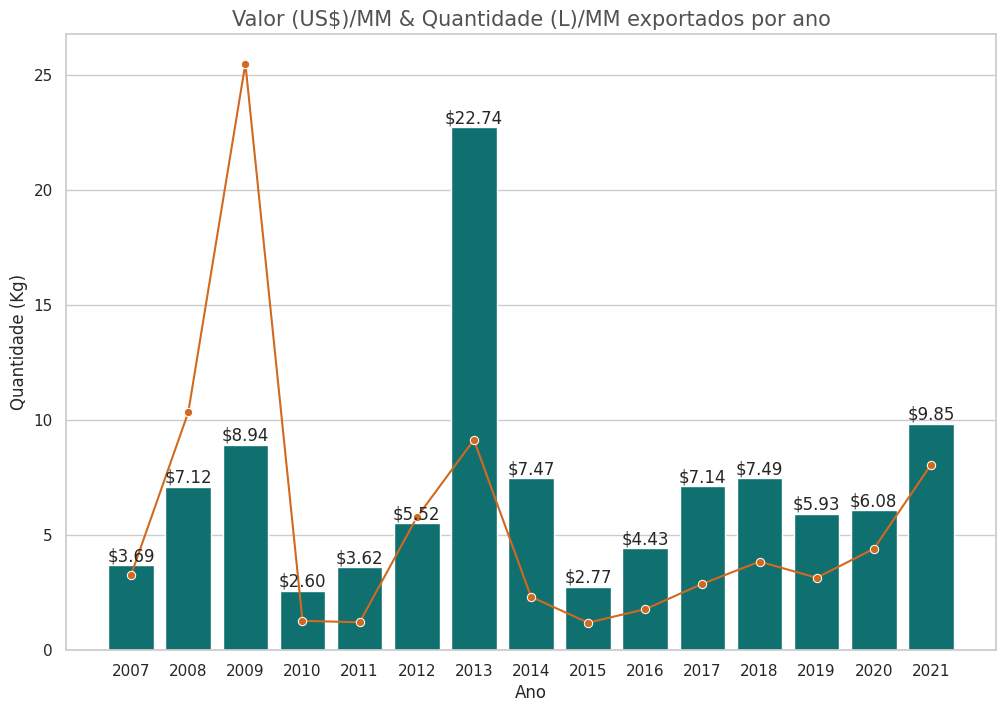

In [23]:
# Criando o gráfico de barras com linhas

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.barplot(x='Ano', y='Valor (US$)', data=total_por_ano, color='teal')
sns.lineplot(x='Ano', y='Quantidade (Kg)', data=total_por_ano, marker='o', color='chocolate')

# Rótulos de dados nas barras
for i, row in total_por_ano.iterrows():
    value = round(row['Valor (US$)'], 2)
    label = f'${value:.2f}'
    plt.text(i, row['Valor (US$)'], label, ha='center', va='bottom')

# Definindo os rótulos dos eixos
plt.xlabel('Ano')
plt.ylabel('Quantidade (Kg)')

# configurações de layout, título e fontes
plt.title("Valor (US$)/MM & Quantidade (L)/MM exportados por ano", fontsize=15, family='Sans-serif', color='#525252')

# Exiba o gráfico
plt.show()